In [1]:
library(circlize)
library(rtracklayer)
library(dplyr)
library(GenomicRanges)
library(ComplexHeatmap) ## legend

circlize version 0.4.16
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))


Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, r

In [29]:
# Read the custom cytoband file
## bioawk -c fastx '{print $name"\t"1"\t"length($seq)}' hap1.fasta|sed "s/_RagTag//" > hap1.ideogram
custom_cytoband <- read.table("chickpea.ideogram", header = FALSE, stringsAsFactors = FALSE)

# Rename columns for clarity
colnames(custom_cytoband) <- c("chr", "start", "end")
custom_cytoband

chr,start,end
<chr>,<int>,<int>
ca1,1,48359943
ca2,1,36634854
ca3,1,39989001
ca4,1,49191682
ca5,1,48169137
ca6,1,59463898
ca7,1,48961560
ca8,1,16477302


In [9]:
# Load necessary library
library(readr)

In [41]:
# Read the tab-delimited file into a table
qtl_file <- "qtl_markers.txt"
qtl_table <- read_delim(qtl_file, delim = "\t")

# Convert the third column into a list of strings
qtl_chromosomes <- as.character(qtl_table[[3]])
qtl_positions <- as.numeric(qtl_table[[4]])
qtl_labels <- as.character(qtl_table[[1]])

Rows: 7 Columns: 4
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): CaAlt1-1, AVR-Ca-00482.01-000775606, ca1
dbl (1): 775606

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [56]:
# Read the tab-delimited file into a table
gene_file <- "homolog_gene_less.txt"
gene_table <- read_delim(gene_file, delim = "\t")

# Convert the third column into a list of strings
gene_chromosomes <- as.character(gene_table[[2]])
gene_positions <- as.numeric(gene_table[[5]])
# Read the ninth column
ninth_column <- gene_table[[10]]

# Split each entry by ";" and extract the first field
gene_labels0 <- sapply(strsplit(as.character(ninth_column), ";"), function(x) x[1])
# Perform the string replacement
gene_labels <- gsub("ID=gene-", "", gene_labels0)

New names:
• `.` -> `....7`
• `.` -> `....9`
Rows: 7 Columns: 10
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (8): XP_004486970.1  LOC101497782, ca1, Gnomon, gene, ....7, +, ....9, I...
dbl (2): 11155685, 11160403

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [57]:
gene_labels

[1] "LOC101493885" "LOC101513987" "LOC101495525" "LOC101488282" "LOC101509308"
[6] "LOC101505909" "LOC101514527"

Warning message:
“'start.degree' can only be modified before `circos.initialize`, or
maybe you forgot to call `circos.clear` in your last plot.”


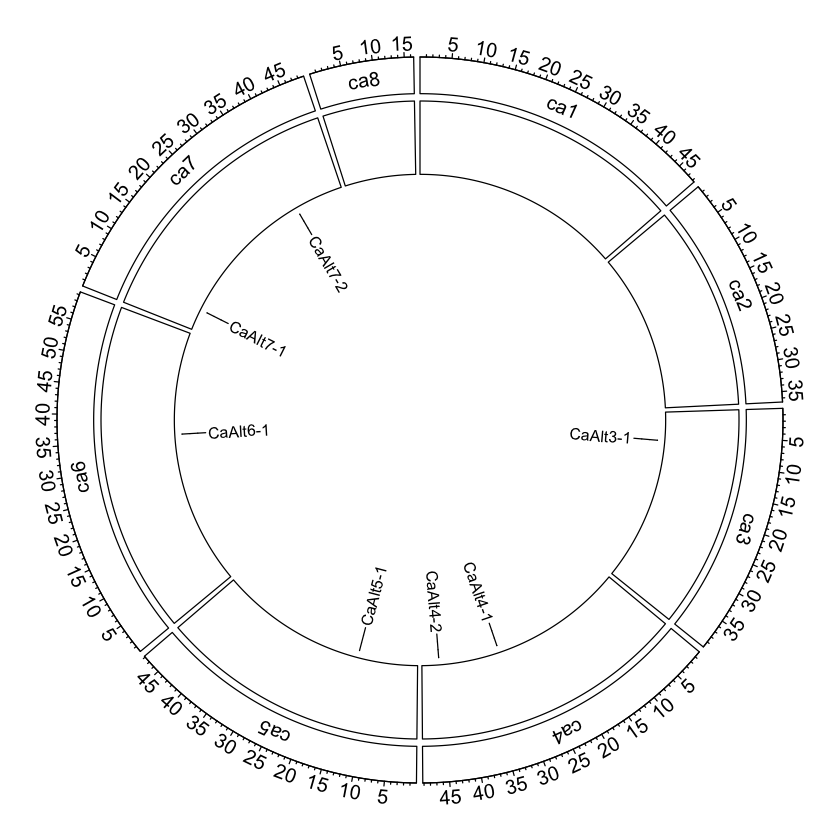

In [40]:
# png("chickpea_circos_updated.png", width = 1000, height = 1000)
# Initialize the circos plot with the custom ideogram
# Set the start angle
circos.par(start.degree = 90)
circos.initializeWithIdeogram(custom_cytoband, plotType = NULL)

circos.track(ylim = c(0, 1), track.height = 0.1, panel.fun = function(x, y) {
    breaks = seq(0, 1e9, by = 5e6)
    circos.genomicAxis(major.at = breaks, labels = paste0(breaks/1e6, ""), labels.cex = 1)
    circos.text(CELL_META$xcenter, CELL_META$ycenter, CELL_META$sector.index, cex=1)
})

circos.track(ylim = c(0, 1))
circos.labels(c(chromosomes), x = c(positions), labels = c(labels))

circos.clear()

In [47]:
gene_chromosomes

[1] "Gnomon" "Gnomon" "Gnomon" "Gnomon" "Gnomon" "Gnomon" "Gnomon"

In [62]:
?circos.labels()

In [70]:
png("chickpea_circos_updated.png", width = 800, height = 800)
# Initialize the circos plot with the custom ideogram
# Set the start angle
circos.par(start.degree = 90)
circos.initializeWithIdeogram(custom_cytoband, plotType = NULL)

circos.track(ylim = c(0, 1), track.height = 0.1, panel.fun = function(x, y) {
    breaks = seq(0, 1e9, by = 5e6)
    circos.genomicAxis(major.at = breaks, labels = paste0(breaks/1e6, ""), labels.cex = 1)
    circos.text(CELL_META$xcenter, CELL_META$ycenter, CELL_META$sector.index, cex=1.5)

})

circos.track(ylim = c(0, 1), track.height = 0.05)
circos.labels(c(gene_chromosomes, qtl_chromosomes), x = c(gene_positions,qtl_positions), 
              cex = 1.2, labels = c(gene_labels,qtl_labels))

circos.clear()# Close the PNG device
dev.off()

pdf 
  2

In [71]:
gene_table

XP_004486970.1 LOC101497782,ca1,Gnomon,gene,11155685,11160403,....7,+,....9,ID=gene-LOC101497782;Dbxref=GeneID:101497782;Name=LOC101497782;gbkey=Gene;gene=LOC101497782;gene_biotype=protein_coding
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
XP_004487722.1 LOC101493885,ca1,Gnomon,gene,14463723,14466287,.,+,.,ID=gene-LOC101493885;Dbxref=GeneID:101493885;Name=LOC101493885;gbkey=Gene;gene=LOC101493885;gene_biotype=protein_coding
XP_004491273.1 LOC101513987,ca2,Gnomon,gene,33781947,33784917,.,+,.,ID=gene-LOC101513987;Dbxref=GeneID:101513987;Name=LOC101513987;gbkey=Gene;gene=LOC101513987;gene_biotype=protein_coding
XP_004493719.1 LOC101495525,ca3,Gnomon,gene,30493076,30496933,.,-,.,ID=gene-LOC101495525;Dbxref=GeneID:101495525;Name=LOC101495525;gbkey=Gene;gene=LOC101495525;gene_biotype=protein_coding
XP_004494917.1 LOC101488282,ca3,Gnomon,gene,35680003,35684082,.,-,.,ID=gene-LOC101488282;Dbxref=GeneID:101488282;Name=LOC101488282;gbkey=Gene;gene=LOC101488282;gene_biotype=protein_coding
XP_004499881.1 LOC101509308,ca5,Gnomon,gene,16522379,16529693,.,+,.,ID=gene-LOC101509308;Dbxref=GeneID:101509308;Name=LOC101509308;gbkey=Gene;gene=LOC101509308;gene_biotype=protein_coding
XP_004506221.1 LOC101505909,ca6,Gnomon,gene,31633696,31636481,.,-,.,ID=gene-LOC101505909;Dbxref=GeneID:101505909;Name=LOC101505909;gbkey=Gene;gene=LOC101505909;gene_biotype=protein_coding
XP_004510955.1 LOC101514527,ca7,Gnomon,gene,39786461,39798690,.,-,.,ID=gene-LOC101514527;Dbxref=GeneID:101514527;Name=LOC101514527;gbkey=Gene;gene=LOC101514527;gene_biotype=protein_coding
